# Mexico Antenna retagging and GC visualization

**OBS** este notebook se debe correr local por ahora por la dependencia de "geopandas"
Los archivos necesarios son los .geojson maps de mexico y el file "antennas_mexico.csv" que esta en el repo de mobility-study:/mapa_mexico/data/antennas_mexico.csv

La segunda parte del notebook se tiene que correr en wilde por el uso intensivo de memoria.

La idea es

* Graficar el mapa de la zona epidemica de Mexico
* Definir a mano la zona GC y agregar esa info a la de las antennas

In [1]:
import pandas as pd; import numpy as np; import os;import random;
pd.set_option('display.max_rows', 300)
from matplotlib import pyplot as plt
%matplotlib inline
import unicodedata
import gzip

import geopandas as gpd;
from geopandas.geoseries import *
import shapely

rootdir=os.getcwd()
#este relative path podria fallar dependiendo de donde uno tenga el repositorio
rootdir = os.path.expanduser('~/Repositories/Tesis')
np.random.seed(2015)

In [2]:
global mapa

In [3]:
mapa = gpd.GeoDataFrame.from_file(rootdir+'/mapas/national_estatal.geojson')

In [4]:
mapa[mapa['NOMBRE']==u'Chiapas']

,CVEGEO,NOMBRE,OID,POB1,POB10,POB10_R,POB11,POB11_R,POB12,POB12_R,...,POB7_R,POB8,POB80,POB80_R,POB81,POB81_R,POB8_R,POB9,POB9_R,geometry
6,07,Chiapas,7,4796580,968252,20.2,1334789,27.8,2860151,59.6,...,6.9,1645047,116587,5.0,78285,3.3,34.3,326491,6.8,POLYGON ((-91.97363681088724 17.91143118947898...


In [5]:
!head antennas_mexico.csv

ID|LATITUDE|LONGITUDE|STATE|EPIDEMIC
2797|14.671|-92.372|Chiapas|0
3060|14.682|-92.155|Chiapas|0
3344|14.721|-92.424|Chiapas|0
3487|14.778|-92.179|Chiapas|0
1924|14.786|-92.366|Chiapas|0
1001|14.87|-92.285|Chiapas|0
2914|14.882|-92.265|Chiapas|0
2094|14.888|-92.283|Chiapas|0
2055|14.888|-92.25|Chiapas|0


In [9]:
antenas = pd.read_csv("antennas_mexico.csv",sep="|",
                     header=0,index_col=0)

#chequeo resultados rapido
antenas.sample(100)

,LATITUDE,LONGITUDE,STATE,EPIDEMIC
ID,,,,
1952,18.148,-94.546,Veracruz,1
1444,19.484,-99.181,Distrito_Federal,0
559,22.167,-100.957,San_Luis_Potosi,0
2162,20.942,-89.633,Yucatan,0
4373,19.393,-99.070,Distrito_Federal,0
3348,20.998,-89.615,Yucatan,0
1364,19.699,-101.211,Michoacan_de_Ocampo,0
3659,25.465,-108.088,Sinaloa,0
1085,21.158,-86.839,Quintana_Roo,0


In [10]:
#chequeo si hay info faltante
antenas[pd.isnull(antenas).any(axis=1)]

,LATITUDE,LONGITUDE,STATE,EPIDEMIC
ID,,,,


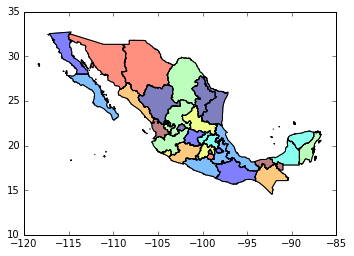

In [11]:
mapa.plot()

# Muy importante!
 
Las coordenadas en un mapa se dan en (lat, long) que no corresponden a las coordenadas cartesianas sino a (y,x) con lo cual es importante armar los **Point** con (long,lat), sino imposible comprarar quien esta dentro de que..

In [12]:
subset =  antenas[['LONGITUDE','LATITUDE']]
tuples = [shapely.geometry.Point(x) for x in subset.values] 
global antenas_gpd 
antenas_gpd =  gpd.GeoSeries(tuples)

In [28]:
antenas['STATE'].unique()

array([u'Chiapas', u'Oaxaca', u'Guerrero', u'Tabasco', u'Veracruz',
       u'Michoacan_de_Ocampo', u'Puebla', u'Morelos', u'Quintana_Roo',
       u'Campeche', u'Mexico', u'Colima', u'Tlaxcala', u'Distrito_Federal',
       u'Jalisco', u'Hidalgo', u'Guanajuato', u'Queretaro', u'Yucatan',
       u'Nayarit', u'Aguascalientes', u'San_Luis_Potosi', u'Tamaulipas',
       u'Zacatecas', u'Sinaloa', u'Baja_California_Sur', u'Durango',
       u'Nuevo_Leon', u'Coahuila_de_Zaragoza', u'Sonora', u'Chihuahua',
       u'Baja_California'], dtype=object)

## Ahora vemos cuales son del Gran Chaco

recordar que estas son las que estan en los estados de Jalisco, Oaxaca, Veracruz, Guerrero,Morelos, Yucatan, Queretaro, Chiapas, Puebla, Nayarit, Hidalgo y Tabasco.

In [14]:
#basicamente aqui y a mano agregamos los estados mejicanos como epidemicos "a piacere"
def get_epidemic_state(estado):
    sol=0 
    
    #epidemic_states =  [u'Jalisco', u'Oaxaca', u'Puebla',u'Veracruz', u'Guerrero',u'Morelos',
    #                 u'Tabasco',u'Hidalgo']
    if estado in epidemic_states:
        sol =1
    return sol    

antenas['EPIDEMIC']=antenas['STATE'].apply(lambda k: get_epidemic_state(k))

In [15]:
#miramos resultados al azar
antenas.sample(30)

,LATITUDE,LONGITUDE,STATE,EPIDEMIC
ID,,,,
1230,20.532,-103.432,Jalisco,1
3738,19.427,-99.195,Distrito_Federal,0
4426,20.653,-103.393,Jalisco,1
4377,19.417,-99.145,Distrito_Federal,0
809,19.404,-99.162,Distrito_Federal,0
2360,19.469,-99.236,Mexico,0
414,19.387,-99.214,Distrito_Federal,0
3782,24.050,-104.594,Durango,0
7,21.018,-89.617,Yucatan,0


In [26]:
#algunas estadisticas basicas
len(antenas),antenas.EPIDEMIC.sum(),antenas.EPIDEMIC.sum()*1.0/len(antenas)

(4464, 1080, 0.24193548387096775)

In [27]:
fig = plt.figure(figsize=(8,8),dpi=300)

In [35]:
#como la informacion de las antennas no 
antenas.to_csv(rootdir +"/play_ants/antennas_mexico.csv",index=False,sep="|")

PySAL not installed, setting map to default


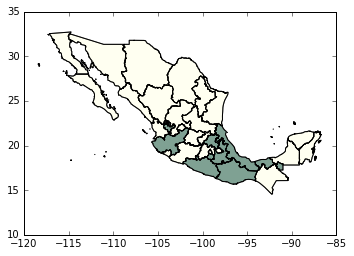

In [41]:
kw = dict(column="EPIDEMIC",k=6,colormap='YlGn')
mapa.plot(scheme = "Quantile",**kw)